In [1]:
from nebula.common import get_locs_frames, play_video, get_loc_frame, display, display_color, display_list_color
import os.path as osp
import matplotlib.pyplot as plt

##### The original dataset had several issues:

- The actions are too complex very hard for the neural network to segment automatically

- Impossible to use single frame to do image recognition for comparison

- Very few single action videos to do single action recognition

- Angle Variations are too great for quick checks

##### UCF101 dataset

- Videos are too large, very slow to train

- Too many categories and too few samples for each category

- Video shapes are not uniform, leading to repeated failures

##### New dataset (YG_AR)

- The new dataset is consisted of 10 actions, each action a yoga pose:

- camel, chair, childs, lord_of_the_dance, lotus, thunderbolt, triangle, upward_dog, warrior_II, warrior_III

- Each Yoga pose has 4 variations (standard, extreme, poor, very poor)

- Each action is recorded with 18 cameras (from Y angle -20, -15,..., 15, 20 and X angle 0, 5) 

- In addition, the character playing the action has 4 different types of hair style, shirt pattern and pants pattern.

- In total there are 10X4X18X4X4X4 = 46080 videos

In [3]:
base_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/videos/'

In [3]:
file = 'lord_of_the_dance_1_hair_2_cloth_0_pants_1_y00_x05_pp.mp4'
play_video(osp.join(base_path, file))

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...', height='400', wid…

In [4]:
file = 'warrior_III_4_hair_3_cloth_3_pants_2_y10_x05_np.mp4'
play_video(osp.join(base_path, file))

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...', height='400', wid…

#### 10 Yoga Pose

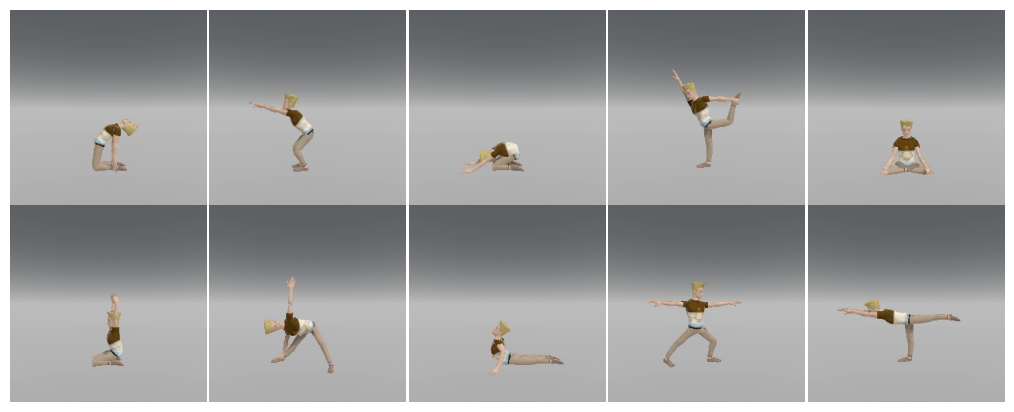

In [6]:
files = [
    "camel_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "chair_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "childs_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "lord_of_the_dance_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "lotus_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "thunderbolt_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "triangle_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "upward_dog_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "warrior_II_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
    "warrior_III_1_hair_2_cloth_3_pants_1_y00_x00_pp.mp4",
]
frames = [get_loc_frame(osp.join(base_path, f)) for f in files]
display_list_color(frames, 2, 5)

#### 4 types of hair, shirt pattern, pants pattern

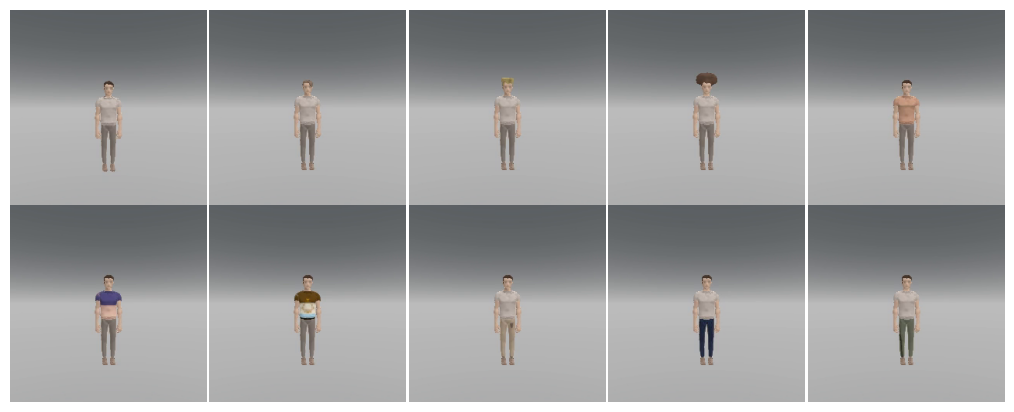

In [9]:
files = [
    "camel_1_hair_0_cloth_0_pants_0_y00_x00_pp.mp4",
    "camel_1_hair_1_cloth_0_pants_0_y00_x00_pp.mp4",
    "camel_1_hair_2_cloth_0_pants_0_y00_x00_pp.mp4",
    "camel_1_hair_3_cloth_0_pants_0_y00_x00_pp.mp4",
    "camel_1_hair_0_cloth_1_pants_0_y00_x00_pp.mp4",
    "camel_1_hair_0_cloth_2_pants_0_y00_x00_pp.mp4",
    "camel_1_hair_0_cloth_3_pants_0_y00_x00_pp.mp4",
    "camel_1_hair_0_cloth_0_pants_1_y00_x00_pp.mp4",
    "camel_1_hair_0_cloth_0_pants_2_y00_x00_pp.mp4",
    "camel_1_hair_0_cloth_0_pants_3_y00_x00_pp.mp4",
]
frames = [get_loc_frame(osp.join(base_path, f), loc=0) for f in files]
display_list_color(frames, 2, 5)

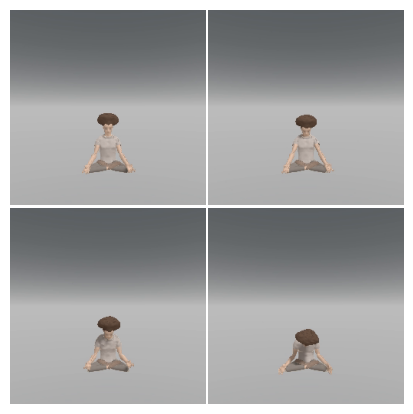

In [13]:
files = [
    "lotus_1_hair_3_cloth_0_pants_0_y00_x00_pp.mp4",
    "lotus_2_hair_3_cloth_0_pants_0_y00_x00_pp.mp4",
    "lotus_3_hair_3_cloth_0_pants_0_y00_x00_pp.mp4",
    "lotus_4_hair_3_cloth_0_pants_0_y00_x00_pp.mp4",
]
frames = [get_loc_frame(osp.join(base_path, f), loc=0.5) for f in files]
display_list_color(frames, 2, 2)

#### model 1

- use middle image of each video to train a transformer model with CNN layers

In [1]:
import nebula.model.yg_ar_net_cnn_emb.evaluate as ygar1

c:\users\aphri\miniconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


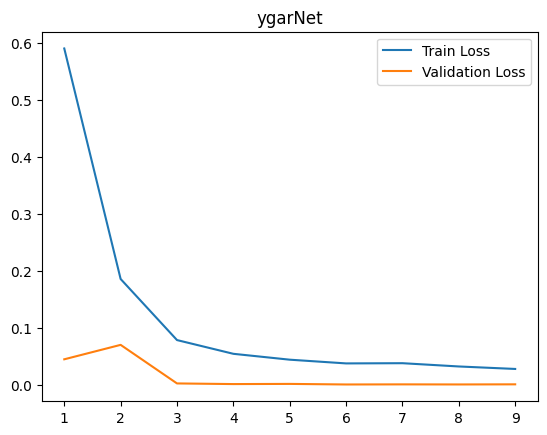

In [3]:
ygar1.show_results()

In [4]:
ygar1.evaluate()

progress 10%, accuracy: 100.0%
progress 20%, accuracy: 100.0%
progress 30%, accuracy: 100.0%
progress 40%, accuracy: 100.0%
progress 50%, accuracy: 100.0%
progress 60%, accuracy: 100.0%
progress 70%, accuracy: 100.0%
progress 80%, accuracy: 100.0%
progress 90%, accuracy: 100.0%
accuracy: 1.0


#### model 2

- Using 3 frames from each video to train same model

In [6]:
import nebula.model.yg_ar_net_cnn_emb_f3.evaluate as ygar2

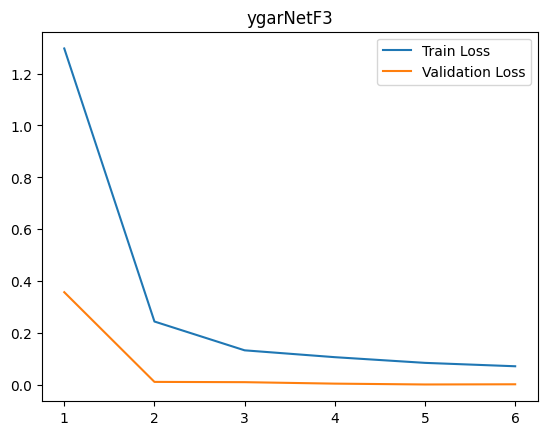

In [7]:
ygar2.show_results()

In [8]:
ygar2.evaluate()

progress 10%, accuracy: 100.0%
progress 20%, accuracy: 100.0%
progress 30%, accuracy: 100.0%
progress 40%, accuracy: 100.0%
progress 50%, accuracy: 100.0%
progress 60%, accuracy: 100.0%
progress 70%, accuracy: 100.0%
progress 80%, accuracy: 100.0%
progress 90%, accuracy: 100.0%
accuracy: 1.0


# TODO

#### model 3: combination of 2 actions

#### classic models: SVM, logistic regression